# Students Performance Analysis
___

## Imports
- numpy to handle array functions
- pandas to manipulate data 
- matplotlib.pyplot for plotting data

In [1]:
# First, we'll import the needed libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Introduction

Describe project 

#### **Load the Data**

In [2]:
# Nest, we'll load the students performance dataset, which is in the "..\Module-2\" directory
df = pd.read_csv("StudentsPerformance.csv") # the dataset is now a Pandas DataFrame
df.head(10) # print the first 10 rows

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


#### **Basic information about data**

In [3]:
df.shape

(1000, 8)

It appears that we have 8 columns of data and 1000 rows

In [4]:
df.dtypes # Check data type of each column

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

It appears that each column corresponds to each true value (object type)

In [5]:
df.info() # Check the Dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.isna().sum() # Check for missing values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

It appears there are no missing values in the DataFrame

In [7]:
df.describe() # Check statistical summary of numerical variables

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
df[df.duplicated()].sum() #Check for duplicates

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64

Great! It appears that there are no duplicates! However for more readability I will rename the coulmns

In [20]:
df.rename(columns={'parental level of education': 'parental_level_of_education',
                   'test preparation course': 'test_preparation_course',
                   'math score':'math_score',
                   'reading score' : 'reading_score',
                   'writing score' : 'writing_score'}, inplace=True)

In [21]:
df.columns # Check if columns' names changed

Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

#### **Plot the Data**
To plot the Data I used 3 plots, which are:
- **Bar Chat:** a plot that shows number of female/male students who have an A grade (score >= 80) in math, writing, and reading!
- **Disterbution Chart:** a plot that shows the grade disterbution in math, writing, and reading.
- **Pie Chart:** a plot that shows the rate of each race/ethnicity. 

#### Bar Chart

In [9]:
def autolabel(rects,ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [26]:
def plot_bar_chart():
       subjects = ['Math', 'Writing', 'Reading']
       females_grades = [len(df[df['gender'] == 'female'].query("math_score >= 80")),
                    len(df[df['gender'] == 'female'].query("reading_score >= 80")),
                    len(df[df['gender'] == 'female'].query("writing_score >= 80"))]
       males_grades = [len(df[df['gender'] == 'male'].query("math_score >= 80")),
                      len(df[df['gender'] == 'male'].query("reading_score >= 80")),
                      len(df[df['gender'] == 'male'].query("writing_score >= 80"))]

       x = np.arange(len(subjects))  # the label locations
       width = 0.35  # the width of the bars

       fig, ax = plt.subplots()
       rects1 = ax.bar(x - width/2, males_grades, width, label='Male')
       rects2 = ax.bar(x + width/2, females_grades, width, label='Female')

       # Add some text for labels, title and custom x-axis tick labels, etc.
       ax.set_ylabel('Subjects')
       ax.set_ylabel('Number of Students (F/M)')
       ax.set_title('Scores of grade A by subjects and gender')
       ax.set_xticks(x)
       ax.set_xticklabels(subjects)
       ax.legend()
       
       autolabel(rects1,ax)
       autolabel(rects2,ax)

       fig.tight_layout()
       plt.show()

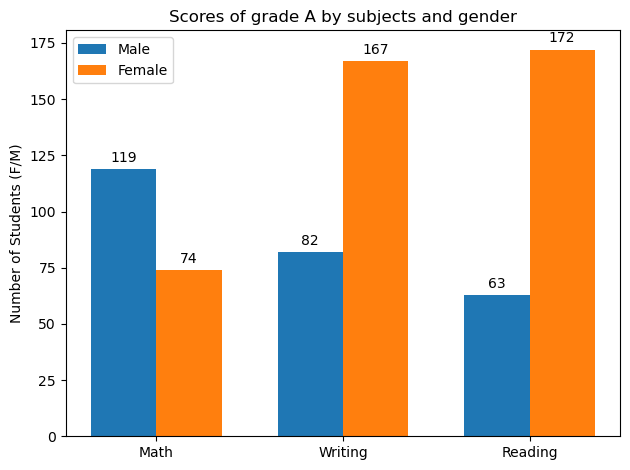

In [27]:
plot_bar_chart()

**From the plot we notice that female students excels at writing and reading than male students. While male students excel at math.**

#### Disterbution Chart

In [46]:
def dist_plot():
    sns.set_style("whitegrid")
    #plot distribution of points by subjects 
    sns.kdeplot(df['math_score'], color='b', shade=True, label='Math')
    sns.kdeplot(df['writing_score'], color='r', shade=True, label='Wrting')
    sns.kdeplot(df['reading_score'], color='g', shade=True, label='Reading')

    #add legend
    plt.legend(['Math', 'Writing' , 'Reading'], title='Subjects')

    #add x-axis label
    plt.xlabel('Scores')

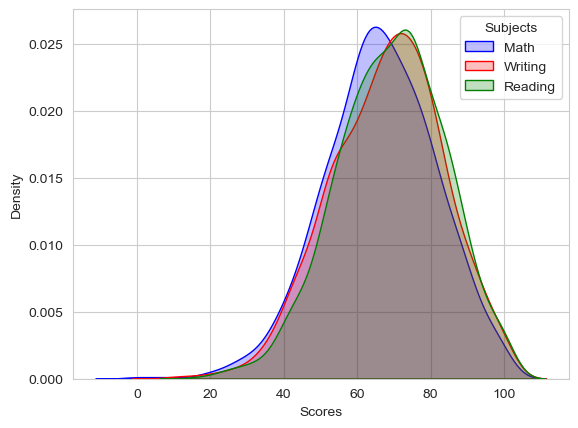

In [47]:
dist_plot()

**From the plot we notice that most students score between 60 - 70 at math. While at reading and writing they score between 70 - 80. Which proves that most studendts score better at reading and writing than math.**

#### Pie Chart

In [74]:
def pie_chart_plot():
    data = [len(df[df['race/ethnicity'] == 'group A']),
            len(df[df['race/ethnicity'] == 'group B']),
            len(df[df['race/ethnicity'] == 'group C']),
            len(df[df['race/ethnicity'] == 'group D']),
            len(df[df['race/ethnicity'] == 'group E'])]
    labels = ['Group A', 'Group B', 'Group C', 'Group D', 'Group E']
    colors = sns.color_palette('pastel')[0:7]
    plt.figure(figsize=(10,8))
    plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
    plt.title('Race/Ethnicity Rates %', fontdict={"fontsize":12},pad=20)
    plt.legend(title = "race/ethnicity:",loc='best') 
    plt.show()

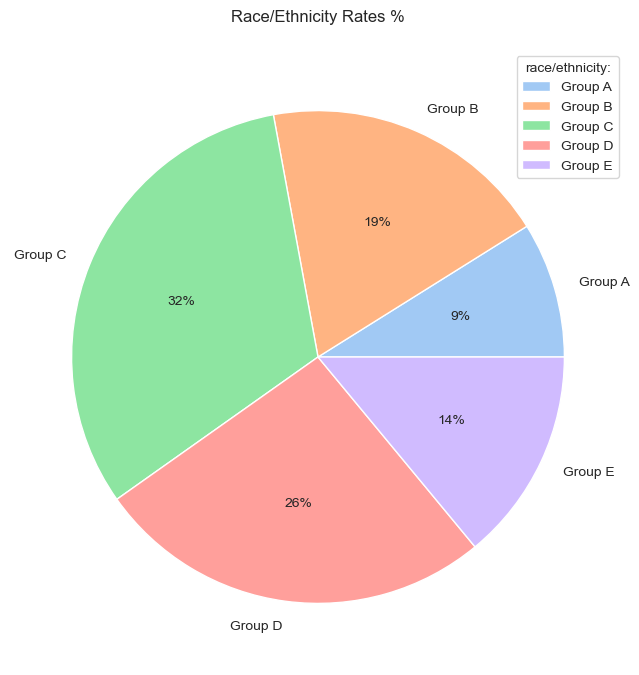

In [75]:
pie_chart_plot()

**From the pie chart we notice that most students race/ethnicity is group C with 32%. While the least is group A with 9%.**